# 1 ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

# Contenido <a id='back'></a>

* [Introducción](#intro)
    * [Descripción de los datos](#data_review)
    * [Diccionario de datos](#dictionary)
    * [Plan de solucion](#plan)
* [1  ¿Cuál es la mejor tarifa?](#plan)
    * [1.1  Inicialización](#kickoff)
    * [1.2  Cargar datos](#dataload)
    * [1.3  Preparar los datos](#data_preprocessing)
    * [1.4  Tarifas](#fees)
    * [1.5  Corregir datos](#fess_wrangling)
    * [1.6  Enriquecer los datos](#fees_processing)
    * [1.7  Usuarios/as](#users)
        * [1.7.1  Corregir los datos](#users_wrangling)
        * [1.7.2  Enriquecer los datos](#users_processing)
    * [1.8  Llamadas](#calls)
        * [1.8.1  Corregir los datos](#calls_wrangling)
        * [1.8.2  Enriquecer los datos](calls_processing)
    * [1.9  Mensajes](#sms)
        * [1.9.1  Corregir los datos](#sms__wrangling)
        * [1.9.2  Enriquecer los datos](#calls_processing)
    * [1.10  Internet](#data)
        * [1.10.1  Corregir los datos](#data_wrnagling)
        * [1.10.2  Enriquecer los datos](#data_processing)
    * [1.11  Estudiar las condiciones de las tarifas](#fees_analisys)
    * [1.12  Agregar datos por usuario](#data_adding)
    * [1.13  Estudia el comportamiento de usuario](#user_consumption)
        * [1.13.1  Llamadas](#calls_consumption)
        * [1.13.2  Mensajes](#sms_consumption)
        * [1.13.3  Internet](#data_consumption)
    * [1.14  Ingreso](#incomes)
    * [1.15  Prueba las hipótesis estadísticas](#hypothesis)
* [1.16  Conclusión general](#end)

# Introducción  <a id='intro'></a>

La empresa operadora de Telecomunicaciones MEGALINE ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. Necesitamos saber cuál de los dos planes genera más ingresos para ajustar el presupuesto de publicidad, de acuerdo a los requerimientos del departamento comercial de la compañía.

Vamos a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos. Más adelante, encontrarás en las instrucciones del proyecto cuáles son exactamente los aspectos del comportamiento de los clientes que debes analizar. Determinar qué plan, en promedio, aporta más ingresos es una cuestión que se abordará mediante pruebas estadísticas. Más adelante encontrarás más información al respecto en la sección de instrucciones del proyecto.

Descripción de las tarifas:

Nota: Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para las llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para el tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

A continuación, puedes ver una descripción de las tarifas:

Surf

1.	Pago mensual: $20 usd.
2.	500 minutos al mes, 50 SMS y 15 GB de datos.
3.	Si se exceden los límites del paquete:

    o	1 minuto: 3 centavos.

    o	1 SMS: 3 centavos.

    o	1 GB de datos: $10 usd.

Ultimate

1.	Pago mensual: $70 usd.
2.	3000 minutos al mes, 1000 SMS y 30 GB de datos.
3.	Si se exceden los límites del paquete:

    o	1 minuto: 1 centavo.

    o	1 SMS: 1 centavo.
    
    o	1 GB de datos: $7 usd.

[Volver a Contenido](#back)

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

# Descripción de los datos <a id='data_review'></a>

Para este trabajo se tienen los siguientes 5 archivos de datos (`/datasets/megaline_users.csv `, `/datasets/megaline_plans.csv `, `/datasets/megaline_calls.csv `, `/datasets/megaline_internet.csv ` y `/datasets/megaline_messages.csv `) los cuales se leeran con la librería Pandas de Python, utilizando el método de lectura de archivos separados por comas `pd.read_csv()` usando el parámetro sep=';' para leer los datos correctamente. 
De primer instancia, se verificará la información para cada uno de los DataFrames.

## Diccionario de datos <a id='dictionary'></a>

Contamos con cinco Datasets en el conjunto de datos, usaremos todas para hacer el preprocesamiento de los datos y el análisis exploratorio de los datos.
A continuación se muestra el diccionario de datos que enumeroa las columnas de cada uno de los Datasets y se describen los datos que contienen.

- `megaline_users.csv`: cada fila corresponde a un usuario en la Compañia Megaline (datos sobre los usuarios).
    - `'user_id'`: identificador único del usuario.
    - `'first_name'`: nombre del usuario.
    - `'last_name'`: apellido del usuario.
    - `'age'`: edad del usuario (en años).
    - `'reg_date'`: fecha de suscripción (dd, mm, aa).
    - `'churn_date'`: la fecha en la que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando fue extraída esta base de datos).
    - `'city'`: ciudad de residencia del usuario.
    - `'plan'`: nombre de la tarifa ('surf' o 'ultimate')

- `megaline_plans.csv `: cada fila corresponde a... (datos sobre las tarifas).
    - `'plan_name'`: nombre de la tarifa.
    - `'usd_monthly_fee'`: pago mensual en dólares estadounidenses.
    - `'minutes_included'`: minutos incluidos al mes.
    - `'messages_included'`: SMS incluidos al mes.
    - `'mb_per_month_included'`: datos incluidos al mes (en megabytes).
    - `'usd_per_minute'`: precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos, el operador cobrará el minuto 101).
    - `'usd_per_message'`: precio por SMS tras exceder los límites del paquete.
    - `'usd_per_gb'`: precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes).

- `megaline_calls.csv`: cada fila corresponde a una llamada única que realizaron los clientes (datos sobre las llamadas).
    - `'id'`: identificador único de la llamada.
    - `'call_date'`: fecha de la llamada.
    - `'duration'`: duración de la llamada (en minutos).
    - `'user_id'`: el identificador del usuario que realiza la llamada.

- `megaline_internet.csv`: cada fila corresponde a una consulta en internet que realizaron los clientes (datos sobre las sesiones web).
    - `'id'`: identificador único de la sesión.
    - `'mb_used'`: el volumen de datos gastados durante la sesión (en megabytes).
    - `'session_date'`: fecha de la sesión web.
    - `'user_id'`: identificador del usuario.

- `megaline_messages.csv`: cada fila corresponde a un mensaje tipo sms que realizaron los clientes (datos sobre los SMS).
    - `'id'`: identificador único del SMS.
    - `'message_date'`: fecha del SMS.
    - `'user_id'`: el identificador del usuario que manda el SMS.

[Volver a Contenido](#back)

## Plan de solución <a id='plan1'></a>

Descripción de los datos.

Para iniciar con la revisión de todos los Datasets, vamos a importa las librerias de Pandas, Numpy y Stats de Scipy que nos serviran para crear un Dataframe por cada uno de los archivos csv.

De esta manera será posible revisar la información contenida en cada archivo, realizando el Preprocesamiento de los datos; como corrección de los nombres de las columnas para cumplir con el formato SnakeCase; rellenar valores ausentes, y eliminar datos duplicados de ser necesario.

Finalmente, realizaremos el Análisis de los datos, creando Hipótesis que nos ayuden a tomar buenas desiciones con la información qye tenemos.

## 1.1 Inicialización <a id='kickoff'></a>

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

## 1.2 Cargar datos     <a id='dataload'></a>

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_users = pd.read_csv(r'C:\Users\10147115\Python Project Folder\TripleTen_DS\Sprint 5_Análisis estadístico de datos\Proyecto SP5\Datasets\megaline_users.csv', sep=',')
df_plans = pd.read_csv(r'C:\Users\10147115\Python Project Folder\TripleTen_DS\Sprint 5_Análisis estadístico de datos\Proyecto SP5\Datasets\megaline_plans.csv', sep=',')
df_calls = pd.read_csv(r'C:\Users\10147115\Python Project Folder\TripleTen_DS\Sprint 5_Análisis estadístico de datos\Proyecto SP5\Datasets\megaline_calls.csv', sep=',')
df_data = pd.read_csv(r'C:\Users\10147115\Python Project Folder\TripleTen_DS\Sprint 5_Análisis estadístico de datos\Proyecto SP5\Datasets\megaline_internet.csv', sep=',')
df_sms = pd.read_csv(r'C:\Users\10147115\Python Project Folder\TripleTen_DS\Sprint 5_Análisis estadístico de datos\Proyecto SP5\Datasets\megaline_messages.csv', sep=',')

## 1.3 Preparar los datos <a id='data_preprocessing'></a>

[Los datos para este proyecto se dividen en varias tablas. 
Explora cada una para tener una comprensión inicial de los datos. 
Si es necesario, haz las correcciones requeridas en cada tabla.]

## 1.4 Tarifas <a id='fees'></a>

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Volver a Contenido](#back)

## Descripción

El dataframe de los planes contiene únicamente 2 filas y 8 columnas, con información sobre las tarifas que se ofrecen.

La mayoría de los datos de las columnas son de tipo números enteros o integer (int64), hay dos columnas con información monetaria (usd) que son de tipo números fraccionarios o float (float64), y finalmente una columna con información de tipo cualitativa o descriptiva (object) que son los nombres de los planes.

La información se ve bien pero podemos cambiar los tipos de datos en todas las columnas que contengan información monetaria en usd, para homologar todas las columnas con esta información.

No se tienen datos eliminados ni ausentes, los nombres de los planes están en minusculas, los nombres de las columnas cumplen el formato snake case, nombres en minúsculas, separación con guiones bajos, sin espacios al principio ni al final.

Por lo que no hay mucho que corregir en este primer dataframe revisado.

## 1.5 Corregir datos <a id='fees_wrangling'></a>

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
# Vamos a cambiar los Dtypes en todas las columnas con información monetaria (usd) de int64 a float64:
df_plans['usd_monthly_pay'] = df_plans['usd_monthly_pay'].astype('float64')
df_plans['usd_per_gb'] = df_plans['usd_per_gb'].astype('float64')
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 260.0+ bytes


[Volver a Contenido](#back)

## 1.6 Enriquecer los datos <a id='fees_processing'></a>

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
# Agregamos una columna que contenga el los Mb (Megabytes) incluídos en Gb (Gigabytes)
gb_included = (df_plans['mb_per_month_included'] / 1024).astype('int64')
df_plans.insert(2, 'gb_included', gb_included)
df_plans

,messages_included,mb_per_month_included,gb_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,15,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,30,3000,70.0,7.0,0.01,0.01,ultimate


[Volver a Contenido](#back)

## 1.7 Usuarios/as <a id='users'></a>

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
333,1333,Macy,David,57,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-11-24,ultimate,NaN
404,1404,Paulita,Conley,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-16,surf,NaN
106,1106,Eddy,Garrison,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-10,surf,2018-11-14
345,1345,Pasquale,Caldwell,26,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-12,surf,NaN
122,1122,Lashay,Reese,57,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-04,surf,NaN


En el dataframe de usuarios, podemos ver 8 columnas con diferentes datos, como 'user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date'.

Al revisar los Dtypes podemos ver eu la columna con fecha de registro 'reg_date' y la columna 'churn_date', son de tipo object; lo cual no es lo más correcto y debe ser corregido a tipo de fecha y con formato de fecha.

También en la última columna llamada 'churn_date' solo tenemos 34 registros y los demás son valores ausentes, lo cual debe corregirse para evitar problemas en el análisis posterios, estos podrían sustituirse con un valor cero o desconocido (unknown).

La muestra a analizar es de 500 usuarios.

### 1.7.1 Corregir los datos <a id='users_wrangling'></a>

Es necesario cambiar el formato de las columnas con fechas, para esto utilizaremos un método de Pandas llamado to_datetime.

Tanto la columna llamada 'reg_date' como la columna 'churn_date' se modificará su formato.

Rellenar los valores ausentes en la columna 'churn_date' con el nombre 'unknown'.

Renombraremos las columnas con nombres más descriptivos.

In [9]:
# cambiamos el formato a fecha en las columnas 'reg_date' y 'churn_date'
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], infer_datetime_format=True)
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], infer_datetime_format=True)

df_users['churn_date'] = df_users['churn_date'].fillna('Unknown')   # Rellenamos los valores ausentes
df_users.columns = ['user_id', 'first_name', 'last_name', 'user_age', 'user_city', 'reg_date', 'plan_name', 'churn_date']   # renombramos las columnas más descriptivas

df_users.info()     # verificamos la información general y los Dtypes de las columnas
df_users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   user_age    500 non-null    int64         
 4   user_city   500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_name   500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


C:\Users\10147115\AppData\Local\Temp\ipykernel_18232\1625800408.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], infer_datetime_format=True)
C:\Users\10147115\AppData\Local\Temp\ipykernel_18232\1625800408.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], infer_datetime_format=True)


,user_id,first_name,last_name,user_age,user_city,reg_date,plan_name,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Unknown
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Unknown
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Unknown
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Unknown
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Unknown
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,Unknown
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,Unknown
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,Unknown
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,Unknown


### 1.7.2 Enriquecer los datos <a id='users_processing'></a>

Al tener una columna con la Fecha de Registro, podemos dividirla para extraer el mes y el año y agregarlos en nuevas columnas cada valor.
Esta información separada, nos podría ser útil para algun análisis más adelante.

In [10]:
# Separaremos los meses y los años de la fecha de registro
reg_month = df_users['reg_date'].dt.month
df_users.insert(6, 'reg_month', reg_month)   # agregamos una columna con el mes de registro

df_users    # imrpimimos el nuevo datafram

,user_id,first_name,last_name,user_age,user_city,reg_date,reg_month,plan_name,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,12,ultimate,Unknown
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,8,surf,Unknown
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,10,surf,Unknown
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,1,surf,Unknown
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,5,surf,Unknown
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,9,surf,Unknown
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,2,surf,Unknown
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,12,ultimate,Unknown
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,2,surf,Unknown


[Volver a Contenido](#back)

## 1.8 Llamadas <a id='calls'></a>

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
df_calls.sample(5)

,id,user_id,call_date,duration
90507,1328_137,1328,2018-09-23,4.25
125866,1445_281,1445,2018-08-26,5.59
42550,1156_155,1156,2018-05-21,13.25
128622,1462_35,1462,2018-11-13,0.10
4729,1021_303,1021,2018-12-25,11.87


En el dataframe de llamadas, tenemos únicamente 4 columnas: 'id', 'user_id', 'call_date' y 'duration'.

Revisando los Dtypes podemos notar que la información de la columna 'call_date' está como un 'object' lo cual no es correcto, tendremos que corregir este formato. al igual que la duración de las llamadas está en minutos.

Se tiene un registro de 137,735 llamadas, sin datos ausentes o nulos.

### 1.8.1 Corregir los datos <a id='calls_wrangling'></a>

Vamos a cambiar el Dtype de la columna 'call_date' para convertirlo en formato de fecha.

También actualizaremos el nombre de las columnas.

In [13]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], infer_datetime_format=True)       # cambiamos el formato a fecha en la columna de 'call_date'
df_calls.columns = ['call_id', 'user_id', 'call_date', 'duration']
df_calls.info()    # revisamos la información general nuevamente
df_calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_id    137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


C:\Users\10147115\AppData\Local\Temp\ipykernel_18232\2140080087.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], infer_datetime_format=True)       # cambiamos el formato a fecha en la columna de 'call_date'


,call_id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


### 1.8.2 Enriquecer los datos <a id='calls_processing'></a>

En este dataframe de llamadas podemos hacer varias cosas para enriquecer la información.

Primeramente vamos a separar el mes y el año de la fecha de cada llamada.

Seguido de separar la duración en minutos y segundos.

In [14]:
# Separaremos los meses y los años de la fecha de la llamada
call_month = df_calls['call_date'].dt.month
df_calls.insert(3, 'call_month', call_month)   # agregamos una columna con el mes de registro

# Vamos a convertir los minutos en segundos
df_calls['duration_sec'] = df_calls['duration'] * 60
df_calls.columns = ['call_id', 'user_id', 'call_date', 'call_month', 'duration_min', 'duration_sec']

df_calls    # imrpimimos el nuevo datafram

,call_id,user_id,call_date,call_month,duration_min,duration_sec
0,1000_93,1000,2018-12-27,12,8.52,511.2
1,1000_145,1000,2018-12-27,12,13.66,819.6
2,1000_247,1000,2018-12-27,12,14.48,868.8
3,1000_309,1000,2018-12-28,12,5.76,345.6
4,1000_380,1000,2018-12-30,12,4.22,253.2
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,11,8.72,523.2
137731,1499_200,1499,2018-10-20,10,10.89,653.4
137732,1499_201,1499,2018-09-21,9,8.12,487.2
137733,1499_202,1499,2018-10-10,10,0.37,22.2


[Volver a Contenido](#back)

## 1.9 Mensajes <a id='sms'></a>

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes
df_sms.sample(5)

,id,user_id,message_date
23971,1144_473,1144,2018-06-24
36195,1240_76,1240,2018-12-11
24169,1145_24,1145,2018-10-14
39539,1257_92,1257,2018-05-23
22241,1133_175,1133,2018-08-24


En el dataframde de mensajes tipo "sms" tenemos 3 columnas que se llaman 'id', 'user_id' y 'message_date'.

Las columnas tienen Dtype object, int64 y objet, lo cual no es lo correcto al tener un dato de fecha como objeto, este debe ser corregido.

Se tiene un total de 76, 051 mensajes registrados, sin valores nulos.

### 1.9.1 Corregir los datos <a id='sms_wrangling'></a>

Vamos a cambiar el Dtype de la columna 'message_date' para convertirlo en formato de fecha.

Actualisaremos el nombre de las columnas para mejor identificación del id.

In [17]:
df_sms['message_date'] = pd.to_datetime(df_sms['message_date'], infer_datetime_format=True)       # cambiamos el formato a fecha en la columna de 'message_date'
df_sms.columns = ['sms_id', 'user_id', 'message_date']
df_sms. info()    # revisamos la información general nuevamente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   sms_id        76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


C:\Users\10147115\AppData\Local\Temp\ipykernel_18232\402032001.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_sms['message_date'] = pd.to_datetime(df_sms['message_date'], infer_datetime_format=True)       # cambiamos el formato a fecha en la columna de 'message_date'


### 1.9.2 Enriquecer los datos <a id='sms_processing'></a>

En este dataframe de mensajes podemos separar el mes de la fecha de cada mensaje.

In [18]:
df_sms['message_month'] = df_sms['message_date'].dt.month   # agregamos una columna con el mes de registro
df_sms  # revisamos el nuevo dataframe

,sms_id,user_id,message_date,message_month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


[Volver a Contenido](#back)

## 1.10 Internet <a id='data'></a>

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Imprime una muestra de datos para el tráfico de internet
df_data.sample(5)

,id,user_id,session_date,mb_used
37457,1170_15,1170,2018-11-22,959.17
80791,1377_216,1377,2018-08-22,356.53
31346,1144_43,1144,2018-12-15,271.83
70615,1329_355,1329,2018-09-05,519.91
90881,1418_145,1418,2018-10-25,541.84


El dataframe de data sobre internet, se pueden notar 4 columnas principales llamadas 'id', 'user_id', 'session_date' y 'mb_user'.

Las columnas tienen un Dtype de 'object', 'int64', 'object' y 'float64' respectivamente para cada una, al igual que en los otros dataframes, es conveniente corregir el Dtype para la informacion que contenga fechas.

El total de registros de consultas en internet, es de 104,825 líneas de las cuales no hay valores ausentes.

### 1.10.1 Corregir los datos <a id='data_wrangling'></a>

Vamos a cambiar el Dtype de la columna 'session_date' para convertirlo en formato de fecha.

Actualisaremos el nombre de las columnas para mejor identificación del id.

In [21]:
df_data['session_date'] = pd.to_datetime(df_data['session_date'], infer_datetime_format=True)       # cambiamos el formato a fecha en la columna de 'message_date'
df_data.columns = ['data_id', 'user_id', 'session_date', 'mb_used']
df_data.info()    # revisamos la información general nuevamente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   data_id       104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


C:\Users\10147115\AppData\Local\Temp\ipykernel_18232\1893009059.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_data['session_date'] = pd.to_datetime(df_data['session_date'], infer_datetime_format=True)       # cambiamos el formato a fecha en la columna de 'message_date'


### 1.10.2 Enriquecer los datos <a id='data_processing'></a>

Vamos a separar el mes y el año de la fecha de cada consulta en internet.

In [22]:
# Separaremos los meses y los años de la fecha de la llamada
data_month = df_data['session_date'].dt.month
df_data.insert(3, 'session_month', data_month)   # agregamos una columna con el mes de la consulta

df_data.sample(5)      # imprimimos 5 líneas aleatorias del dataframe para ver cómo quedó

,data_id,user_id,session_date,session_month,mb_used
43860,1194_278,1194,2018-11-12,11,0.00
42198,1187_375,1187,2018-05-07,5,156.50
101411,1483_221,1483,2018-09-23,9,866.79
11654,1056_321,1056,2018-10-01,10,406.67
56030,1253_94,1253,2018-12-07,12,349.82


[Volver a Contenido](#back)

## 1.11 Estudiar las condiciones de las tarifas <a id='fees_analisys'></a>

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

### Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
Descripción de las tarifas:

Nota: Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para las llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para el tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

A continuación, puedes ver una descripción de las tarifas:

Surf

1.	Pago mensual: $20 usd.
2.	500 minutos al mes, 50 SMS y 15 GB de datos.
3.	Si se exceden los límites del paquete:

    o	1 minuto: 3 centavos.

    o	1 SMS: 3 centavos.

    o	1 GB de datos: $10 usd.

Ultimate

1.	Pago mensual: $70 usd.
2.	3000 minutos al mes, 1000 SMS y 30 GB de datos.
3.	Si se exceden los límites del paquete:

    o	1 minuto: 1 centavo.

    o	1 SMS: 1 centavo.
    
    o	1 GB de datos: $7 usd.

[Volver a Contenido](#back)

## 1.12 Agregar datos por usuario <a id='data_adding'></a>

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
month_user_calls = df_calls.groupby(['user_id', 'call_month'])['call_id'].count()
month_user_calls.info()
month_user_calls

<class 'pandas.core.series.Series'>
MultiIndex: 2258 entries, (np.int64(1000), np.int32(12)) to (np.int64(1499), np.int32(12))
Series name: call_id
Non-Null Count  Dtype
--------------  -----
2258 non-null   int64
dtypes: int64(1)
memory usage: 28.2 KB


user_id  call_month
1000     12            16
1001     8             27
         9             49
         10            65
         11            64
                       ..
1498     12            39
1499     9             41
         10            53
         11            45
         12            65
Name: call_id, Length: 2258, dtype: int64

In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
month_user_minutes = df_calls.groupby(['user_id', 'call_month'])['duration_min'].sum()
month_user_minutes.info()
month_user_minutes

<class 'pandas.core.series.Series'>
MultiIndex: 2258 entries, (np.int64(1000), np.int32(12)) to (np.int64(1499), np.int32(12))
Series name: duration_min
Non-Null Count  Dtype  
--------------  -----  
2258 non-null   float64
dtypes: float64(1)
memory usage: 28.2 KB


user_id  call_month
1000     12            116.83
1001     8             171.14
         9             297.69
         10            374.11
         11            404.59
                        ...  
1498     12            324.77
1499     9             330.37
         10            363.28
         11            288.56
         12            468.10
Name: duration_min, Length: 2258, dtype: float64

In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
month_user_sms = df_sms.groupby(['user_id', 'message_month'])['sms_id'].count()
month_user_sms.info()
month_user_sms

<class 'pandas.core.series.Series'>
MultiIndex: 1806 entries, (np.int64(1000), np.int32(12)) to (np.int64(1497), np.int32(12))
Series name: sms_id
Non-Null Count  Dtype
--------------  -----
1806 non-null   int64
dtypes: int64(1)
memory usage: 22.7 KB


user_id  message_month
1000     12               11
1001     8                30
         9                44
         10               53
         11               36
                          ..
1496     9                21
         10               18
         11               13
         12               11
1497     12               50
Name: sms_id, Length: 1806, dtype: int64

In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
month_user_data = df_data.groupby(['user_id', 'session_month'])['mb_used'].sum()
month_user_data.info()
month_user_data

<class 'pandas.core.series.Series'>
MultiIndex: 2277 entries, (np.int64(1000), np.int32(12)) to (np.int64(1499), np.int32(12))
Series name: mb_used
Non-Null Count  Dtype  
--------------  -----  
2277 non-null   float64
dtypes: float64(1)
memory usage: 28.4 KB


user_id  session_month
1000     12                1901.47
1001     8                 6919.15
         9                13314.82
         10               22330.49
         11               18504.30
                            ...   
1498     12               23137.69
1499     9                12984.76
         10               19492.43
         11               16813.83
         12               22059.21
Name: mb_used, Length: 2277, dtype: float64

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
tripleplay = pd.concat([month_user_calls, month_user_minutes, month_user_sms, month_user_data], axis=1).reset_index()
tripleplay.columns = ['user_id', 'month', 'calls', 'minutes', 'sms', 'mb']    # Actualizamos los nombres de las columnas para mejor entendimiento

# Reemplazamos los n[umeros por los nombres de los meses
months = {1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}
tripleplay['month'] = tripleplay['month'].replace(months)

# Modificamos los Dtypes para corregirlos
tripleplay['user_id'] = tripleplay['user_id'].astype('object')

# Rellenamos valores ausentes con cero (0)
tripleplay = tripleplay.fillna(0)

tripleplay.info()   # Imprimimos información general y el nuevo dataframe
tripleplay

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  2293 non-null   int64  
 1   month    2293 non-null   object 
 2   calls    2293 non-null   float64
 3   minutes  2293 non-null   float64
 4   sms      2293 non-null   float64
 5   mb       2293 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 107.6+ KB


C:\Users\10147115\AppData\Local\Temp\ipykernel_18232\3163728027.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tripleplay = tripleplay.fillna(0)


,user_id,month,calls,minutes,sms,mb
0,1000,dec,16.0,116.83,11.0,1901.47
1,1001,aug,27.0,171.14,30.0,6919.15
2,1001,sep,49.0,297.69,44.0,13314.82
3,1001,oct,65.0,374.11,53.0,22330.49
4,1001,nov,64.0,404.59,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,dec,0.0,0.00,61.0,13039.91
2289,1361,may,0.0,0.00,2.0,1519.69
2290,1482,oct,0.0,0.00,2.0,0.00
2291,1108,dec,0.0,0.00,0.0,233.17


In [28]:
# Añade la información de la tarifa
tripleplay_plan = tripleplay.merge(df_users, on='user_id')    # combinamos los dataframes de 'all_services' con 'df_users' por el número de id
tripleplay_plan.drop(['first_name', 'last_name', 'user_age', 'user_city', 'reg_date', 'reg_month', 'churn_date'], axis='columns', inplace=True)   # Eliminamos las columnas inecesarias
tripleplay_fee = tripleplay_plan.merge(df_plans, on='plan_name')    # combinamos el nuevo dataframe con 'df_plans' para agregar la información de las tarifas
tripleplay_fee.info()
tripleplay_fee.head()  # imprimimos una muestra de 10 lineas para revisar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   object 
 2   calls                  2293 non-null   float64
 3   minutes                2293 non-null   float64
 4   sms                    2293 non-null   float64
 5   mb                     2293 non-null   float64
 6   plan_name              2293 non-null   object 
 7   messages_included      2293 non-null   int64  
 8   mb_per_month_included  2293 non-null   int64  
 9   gb_included            2293 non-null   int64  
 10  minutes_included       2293 non-null   int64  
 11  usd_monthly_pay        2293 non-null   float64
 12  usd_per_gb             2293 non-null   float64
 13  usd_per_message        2293 non-null   float64
 14  usd_per_minute         2293 non-null   float64
dtypes: f

,user_id,month,calls,minutes,sms,mb,plan_name,messages_included,mb_per_month_included,gb_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,dec,16.0,116.83,11.0,1901.47,ultimate,1000,30720,30,3000,70.0,7.0,0.01,0.01
1,1001,aug,27.0,171.14,30.0,6919.15,surf,50,15360,15,500,20.0,10.0,0.03,0.03
2,1001,sep,49.0,297.69,44.0,13314.82,surf,50,15360,15,500,20.0,10.0,0.03,0.03
3,1001,oct,65.0,374.11,53.0,22330.49,surf,50,15360,15,500,20.0,10.0,0.03,0.03
4,1001,nov,64.0,404.59,36.0,18504.30,surf,50,15360,15,500,20.0,10.0,0.03,0.03


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [29]:
# Calcula el ingreso mensual para cada usuario

tripleplay_fee['incomes'] = 0
tripleplay_fee['extra_charge'] = 0

def revenue (tripleplay_fee):
    plan_charge = tripleplay_fee['usd_monthly_pay']
    usd_per_min = tripleplay_fee['usd_per_minute']
    usd_per_sms = tripleplay_fee['usd_per_message']
    usd_per_mb = tripleplay_fee['usd_per_gb']
        
    for row in tripleplay_fee:
            
        if tripleplay_fee['minutes'] > tripleplay_fee['minutes_included']:
            extra_min = (tripleplay_fee['minutes']) - (tripleplay_fee['minutes_included'])
            extra_charge = extra_min * usd_per_min

        elif tripleplay_fee['sms'] > tripleplay_fee['messages_included']:
            extra_sms = (tripleplay_fee['sms']) - (tripleplay_fee['messages_included'])
            extra_charge = extra_sms * usd_per_sms

        elif tripleplay_fee['mb'] > (tripleplay_fee['gb_included'])*1024:
            extra_mb = (tripleplay_fee['mb']) - (tripleplay_fee['gb_included'])
            extra_charge = extra_mb * usd_per_mb

        tripleplay_fee['extra_charge'] += extra_charge
        tripleplay_fee['incomes'] = plan_charge + extra_charge
    
    return revenue

In [30]:
# Hacemos un nuevo dataframe con que contenga únicamente las ganancias
#revenue = tripleplay_fee[tripleplay_fee['incomes'] > 0]
tripleplay_fee.info()
tripleplay_fee.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   object 
 2   calls                  2293 non-null   float64
 3   minutes                2293 non-null   float64
 4   sms                    2293 non-null   float64
 5   mb                     2293 non-null   float64
 6   plan_name              2293 non-null   object 
 7   messages_included      2293 non-null   int64  
 8   mb_per_month_included  2293 non-null   int64  
 9   gb_included            2293 non-null   int64  
 10  minutes_included       2293 non-null   int64  
 11  usd_monthly_pay        2293 non-null   float64
 12  usd_per_gb             2293 non-null   float64
 13  usd_per_message        2293 non-null   float64
 14  usd_per_minute         2293 non-null   float64
 15  inco

,user_id,month,calls,minutes,sms,mb,plan_name,messages_included,mb_per_month_included,gb_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,incomes,extra_charge
192,1048,oct,25.0,192.02,0.0,12249.23,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0
434,1094,dec,108.0,702.03,49.0,23957.21,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0
1465,1326,sep,121.0,791.82,74.0,12098.38,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0
2221,1492,dec,46.0,276.82,37.0,8854.71,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0
2201,1489,nov,61.0,407.94,91.0,18266.25,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0
1652,1362,nov,95.0,681.92,55.0,13289.27,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0
1700,1373,oct,107.0,738.13,75.0,32574.06,ultimate,1000,30720,30,3000,70.0,7.0,0.01,0.01,0,0
1997,1437,nov,60.0,444.63,0.0,15189.99,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0
2007,1439,sep,42.0,285.14,67.0,12222.24,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0
443,1095,dec,22.0,136.96,11.0,18523.18,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0


[Volver a Contenido](#back)

In [31]:
# Filtramos los usuarios gastalones de minutos que tienen plan ultimate
ultimate_users_extra = tripleplay_fee[(tripleplay_fee['plan_name'] == 'ultimate') & (tripleplay_fee['minutes'] > 3000)]
ultimate_users_extra

# Filtramos los usuarios gastalones del minutos que tienen plan surf
surf_users_extra = tripleplay_fee[(tripleplay_fee['plan_name'] == 'surf') & (tripleplay_fee['minutes'] > 500)]
surf_users_extra

,user_id,month,calls,minutes,sms,mb,plan_name,messages_included,mb_per_month_included,gb_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,incomes,extra_charge
9,1003,dec,149.0,1041.00,50.0,27044.14,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0
23,1007,oct,80.0,610.65,59.0,37885.63,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0
25,1007,dec,87.0,579.43,50.0,29069.28,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0
30,1009,jun,110.0,775.52,0.0,18845.90,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0
31,1009,jul,124.0,826.74,0.0,30421.65,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,1488,nov,109.0,751.66,0.0,19159.52,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0
2198,1488,dec,96.0,678.14,0.0,19805.73,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0
2215,1491,oct,75.0,551.89,51.0,8480.09,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0
2230,1494,oct,78.0,585.82,38.0,14498.50,surf,50,15360,15,500,20.0,10.0,0.03,0.03,0,0


## 1.13 Estudia el comportamiento de usuario <a id='user_consumption'></a>

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### 1.13.1 Llamadas <a id='calls_consumption'></a>

In [32]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. 
calls_mean = tripleplay_plan.groupby(['month', 'plan_name'])['calls'].mean().unstack().reset_index()
calls_mean

plan_name,month,surf,ultimate
0,apr,48.880000,47.523810
1,aug,57.561728,60.070423
2,dec,65.452830,64.900662
3,feb,40.666667,58.285714
4,jan,30.000000,28.000000
5,jul,63.157025,58.694915
6,jun,59.474227,52.170213
7,mar,46.434783,46.000000
8,may,55.701299,57.586207
9,nov,59.120141,62.362205


<Axes: title={'center': 'Llamadas Surf vs Ultimate'}, xlabel='Mes', ylabel='Llamadas Promedio'>

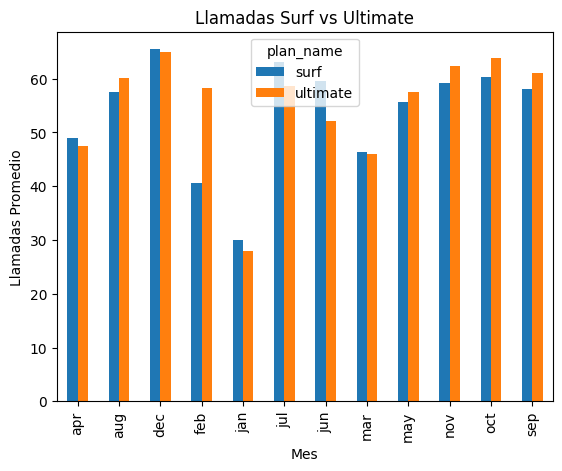

In [33]:
# Traza un gráfico de barras para visualizarla.
calls_mean.plot(kind='bar', x='month', xlabel='Mes', ylabel='Llamadas Promedio', title='Llamadas Surf vs Ultimate')

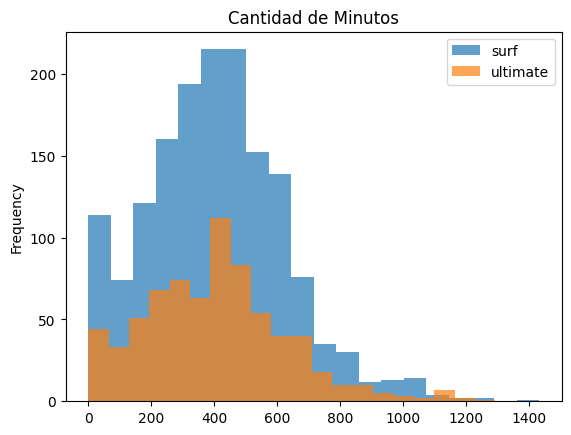

In [34]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
minutes_plan = tripleplay_plan.groupby('plan_name')['minutes'].plot(kind='hist', bins=20, alpha=0.7, title='Cantidad de Minutos', legend=True)

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [35]:
# Calcula la media y la varianza de la duración mensual de llamadas.
median = tripleplay_plan.groupby(['month'])['calls'].mean().reset_index()
variace = tripleplay_plan.groupby(['month'])['calls'].var().reset_index()

# Renombramos las columnas
median.columns = ['month', 'mean']
variace.columns = ['month', 'variance']

# Imprimimos la media y la varianza
print(median)
print()
print(variace)

   month       mean
0    apr  48.478873
1    aug  58.326180
2    dec  65.275053
3    feb  48.375000
4    jan  28.666667
5    jul  61.694444
6    jun  57.090278
7    mar  46.285714
8    may  56.216981
9    nov  60.124390
10   oct  61.411079
11   sep  59.010714

   month     variance
0    apr   822.538833
1    aug  1052.470734
2    dec  1150.122902
3    feb  1140.250000
4    jan   247.866667
5    jul  1219.844662
6    jun   827.341443
7    mar   903.798319
8    may  1064.438185
9    nov  1011.052949
10   oct  1019.172625
11   sep   949.372645


<Axes: xlabel='plan_name'>

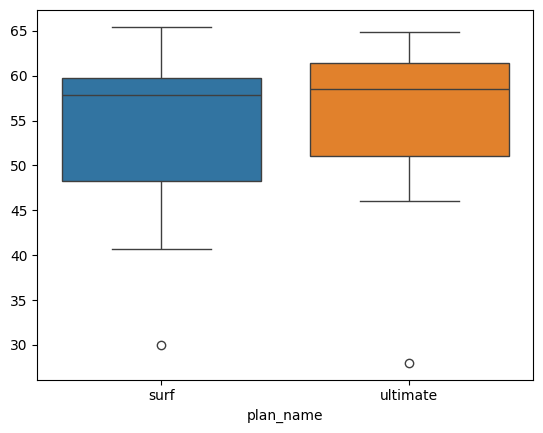

In [36]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(calls_mean)


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

[Volver a Contenido](#back)

### 1.13.2 Mensajes <a id='sms_consumption'></a>

In [37]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
sms_messages = tripleplay_plan.groupby(['month', 'plan_name'])['sms'].sum().unstack().reset_index()
sms_messages


plan_name,month,surf,ultimate
0,apr,870.0,463.0
1,aug,4662.0,2732.0
2,dec,12275.0,6796.0
3,feb,108.0,151.0
4,jan,21.0,62.0
5,jul,3271.0,1937.0
6,jun,2454.0,1379.0
7,mar,351.0,243.0
8,may,1849.0,931.0
9,nov,9165.0,4903.0


<Axes: title={'center': 'Mensajes Surf vs Ultimate'}, xlabel='Mes', ylabel='Llamadas Promedio'>

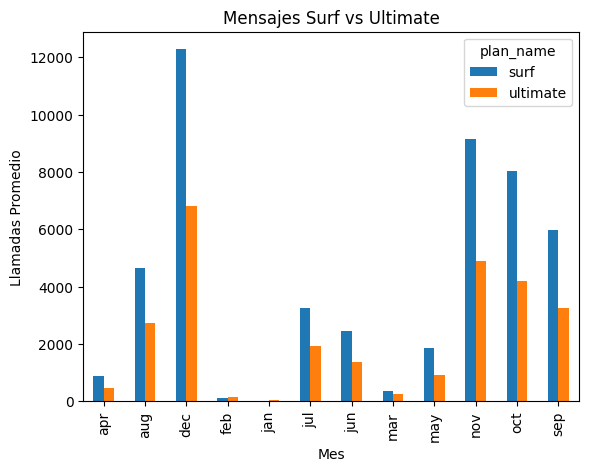

In [38]:
# Traza un gráfico de barras para visualizarlo.
sms_messages.plot(kind='bar', x='month', xlabel='Mes', ylabel='Llamadas Promedio', title='Mensajes Surf vs Ultimate')

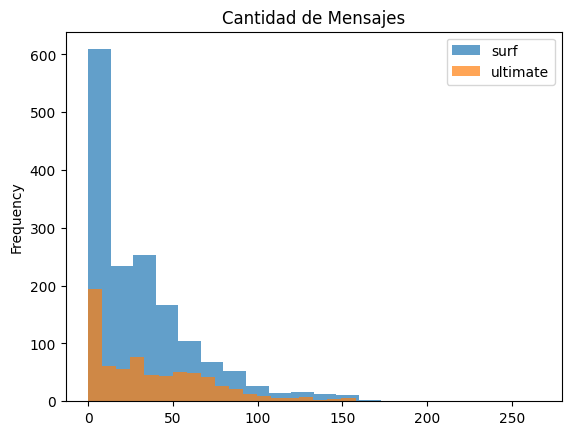

In [39]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.
sms_messages = tripleplay_plan.groupby('plan_name')['sms'].plot(kind='hist', bins=20, alpha=0.7, title='Cantidad de Mensajes', legend=True)

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad mensual de mensajes
sns.boxplot(sms_messages)

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

[Volver a Contenido](#back)

### 1.13.3 Internet <a id='data_consumption'></a>

In [41]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_traffic = tripleplay_plan.groupby(['month', 'plan_name'])['mb'].sum().unstack().reset_index()
internet_traffic

plan_name,month,surf,ultimate
0,apr,599210.15,338554.75
1,aug,2720843.68,1264845.13
2,dec,5766125.26,2766801.97
3,feb,109609.59,119901.66
4,jan,9749.72,27672.37
5,jul,2030815.67,964339.92
6,jun,1484248.33,720882.29
7,mar,306945.12,219858.22
8,may,1073099.33,482109.99
9,nov,4624009.00,2163278.04


<Axes: title={'center': 'Megabytes Surf vs Ultimate'}, xlabel='Mes', ylabel='Megabytes'>

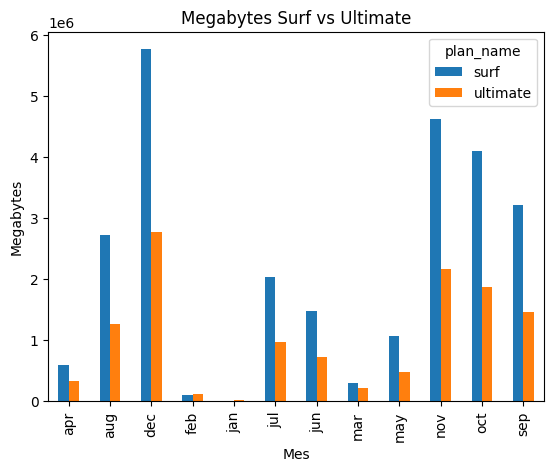

In [42]:
# Traza un gráfico de barras para visualizarlo.
internet_traffic.plot(kind='bar', x='month', xlabel='Mes', ylabel='Megabytes', title='Megabytes Surf vs Ultimate')

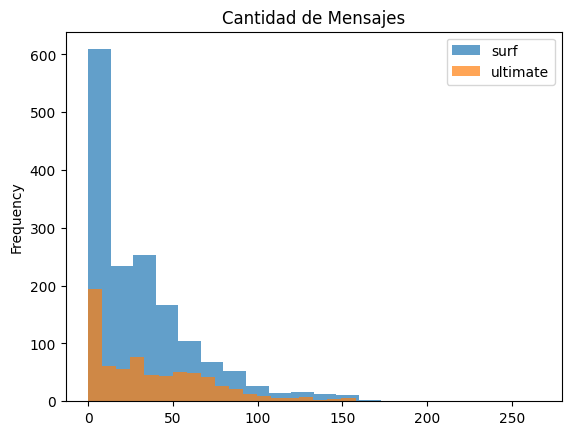

In [43]:
# Compara el número de megabytes mensuales que necesitan los usuarios de cada plan. Traza un histograma.
internet_traffic = tripleplay_plan.groupby('plan_name')['sms'].plot(kind='hist', bins=20, alpha=0.7, title='Cantidad de Mensajes', legend=True)

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad mensual de tráfico de internet
sns.boxplot(internet_traffic)

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

[Volver a Contenido](#back)

## 1.14 Ingreso <a id='incomes'></a>

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

[Volver a Contenido](#back)

## 1.15 Prueba las hipótesis estadísticas <a id='hypotesis'></a>

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis



[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis



[Volver a Contenido](#back)

## 1.16 Conclusión general <a id='end'></a>

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

[Volver a Contenido](#back)